In [14]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import LightCurve
plt.rcParams['font.size'] = 16
sys.path.insert(0, os.path.abspath('/Users/arcticfox/Documents/GitHub/periodic-ri/'))
import periodic_ri as pr

In [31]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter='|', skiprows=1)
    return pr.PeriodicRI(data[:,0], data[:,1], data[:,2])

## Teegarden's Star

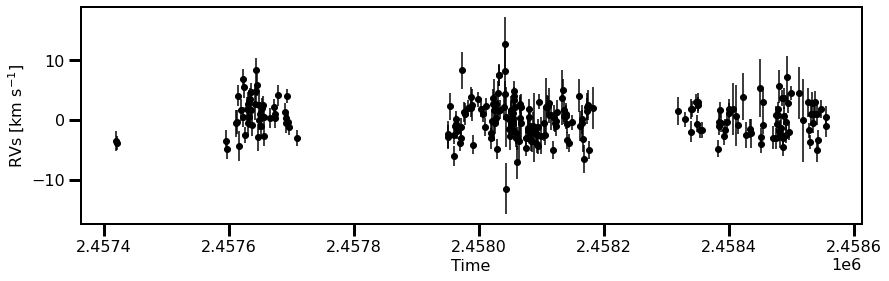

In [25]:
## 0 -- BJD, 1 -- RV, 2 -- sigma
teegarden = load_data('datasets/TeegardensStar.txt')
fig = teegarden.rv_plot()

100%|██████████| 8/8 [00:52<00:00,  6.52s/it]


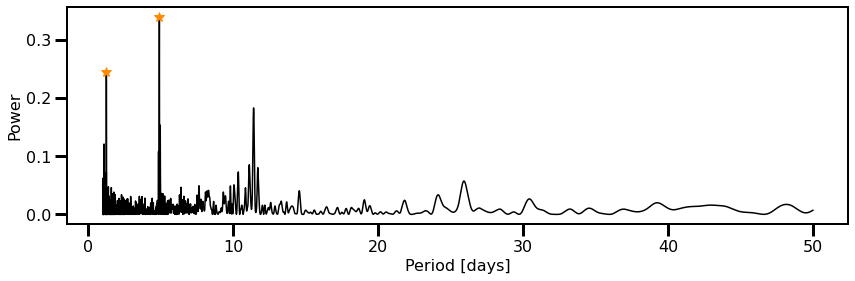

In [27]:
teegarden.build_confidence_set(minperiod=1.0, maxperiod=50.0)
fig = teegarden.ls_plot()

In [28]:
teegarden.cset

array([11.4128915 ,  4.96957904,  4.90944611,  4.85365243,  1.25159698,
        1.09585379,  1.09298606])

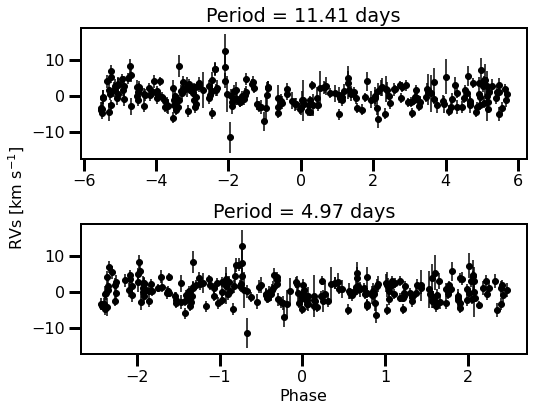

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,6))
axes=[ax1, ax2]

for i in range(2):
    teegarden.fold_rvs(plot=True, period=teegarden.cset[i], ax=axes[i])
    axes[i].set_title('Period = {} days'.format(np.round(teegarden.cset[i],2)))

plt.subplots_adjust(hspace=0.5)
ax2.set_xlabel('Phase')
ax2.set_ylabel('RVs [km s$^{-1}$]', y=1.2);

## Ross 128

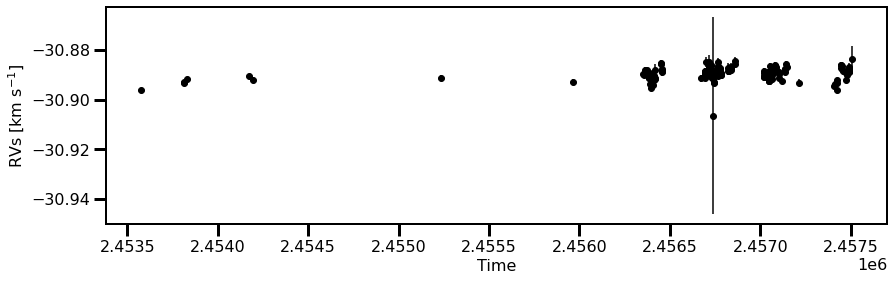

In [32]:
ross = load_data('datasets/Ross128.txt')
fig = ross.rv_plot()

100%|██████████| 3/3 [00:48<00:00, 16.04s/it]


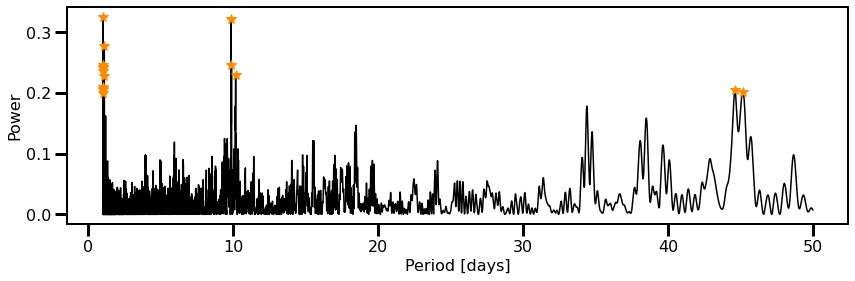

In [33]:
ross.build_confidence_set(minperiod=1.0, maxperiod=50.0)
fig = ross.ls_plot()

In [34]:
ross.cset

array([9.86187132, 1.10942459, 1.00505159])

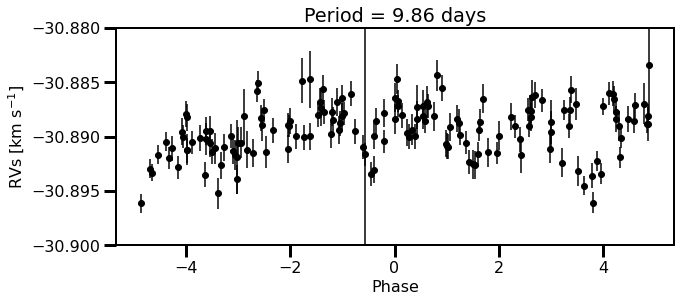

In [40]:
fig, ax = plt.subplots(nrows=1, figsize=(10,4))

ross.fold_rvs(plot=True, period=ross.cset[0], ax=ax)
ax.set_title('Period = {} days'.format(np.round(ross.cset[0],2)))

plt.subplots_adjust(hspace=0.5)
ax.set_xlabel('Phase')
ax.set_ylabel('RVs [km s$^{-1}$]')
ax.set_ylim(-30.9, -30.88);

## GJ 273

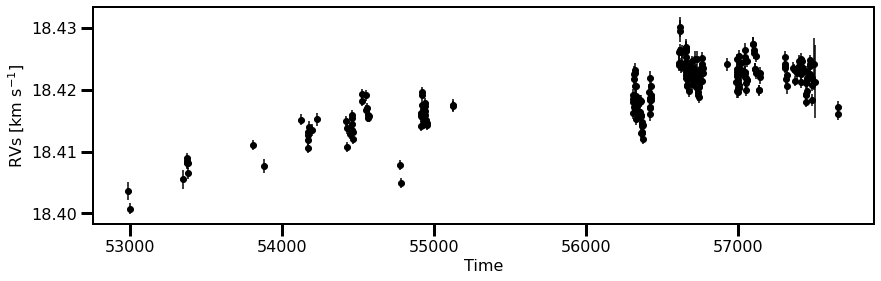

In [42]:
gj273 = load_data('datasets/GJ273.txt')
fig = gj273.rv_plot()

100%|██████████| 12/12 [03:10<00:00, 16.16s/it]


(0.0, 0.1)

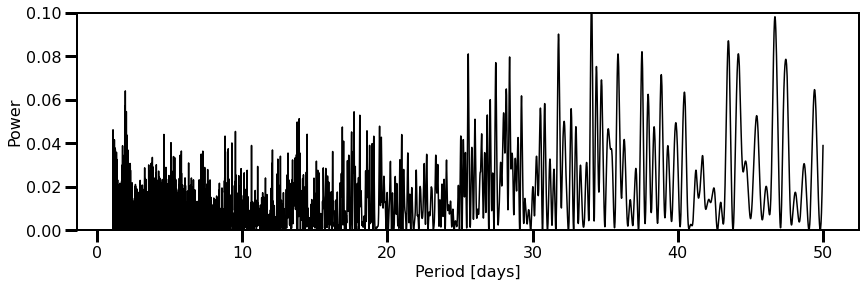

In [55]:
gj273.build_confidence_set(minperiod=1.1, maxperiod=50.0, min_thresh=0.01, time_budget=3.0)
fig = gj273.ls_plot()
fig.set_ylim(0,0.1);

In [56]:
gj273.cset

array([47.44272939, 46.69405187, 44.17058711, 43.48043814, 37.53236957,
       35.88452699, 34.40058852, 34.06471029, 31.79006303, 28.4197891 ,
       27.46802436, 25.57474069])